# Module 6. Labs regression analysis

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [2]:
#pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.3/7.3 MB 10.2 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 KB 9.6 MB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Joris\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

In [4]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


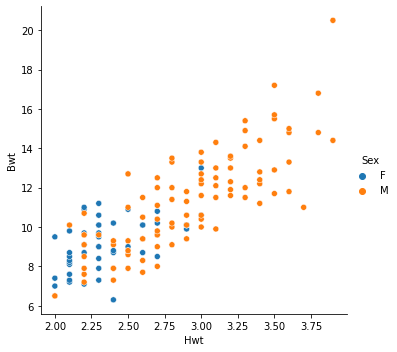

In [5]:
sns.relplot(data=cats, x='Hwt', y='Bwt', hue='Sex')

3. Calculate and draw the regression line.


<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

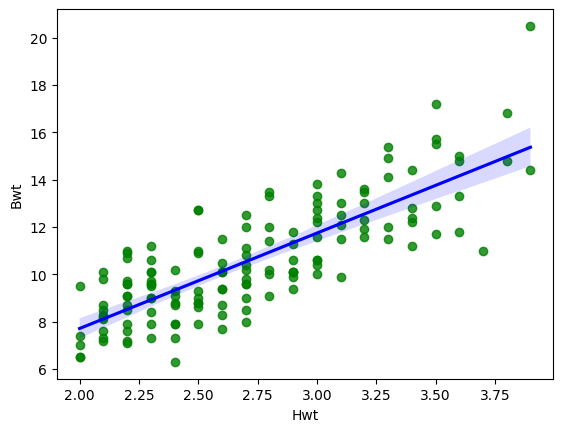

In [6]:
sns.regplot(x=cats.Hwt, y=cats.Bwt, line_kws = {'color': 'b'}, scatter_kws={'color': 'g'})

In [7]:
cats_x = cats.Hwt.values.reshape(-1,1)
cats_y = cats.Bwt

weight_model = LinearRegression().fit(cats_x, cats_y)

print(f"Regression line: y = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: y = -0.35 + 4.03 x


4. Calculate the correlation coefficient and the coefficient of determination.

In [8]:
cor = np.corrcoef(cats.Hwt, cats.Bwt)[0][1]
print(f"R = {cor}")

print(f"R**2 = {cor**2}")

R = 0.804134787315513
R**2 = 0.6466327561709654


5. Interpret the results from the previous steps.

In [9]:
# R-waarde is 0.8 -> increasing and strong linear relation
# R**2-waarde is 0.64 -> The heart weight vs. body weight relationship accounts for 64% of the variation in body weight

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [12]:
male_cats = cats[cats.Sex == 'M']
female_cats = cats[cats.Sex == 'F']

2. Draw a scatter plot of both variables for each gender.


Text(0.5, 1.0, 'Female cats')

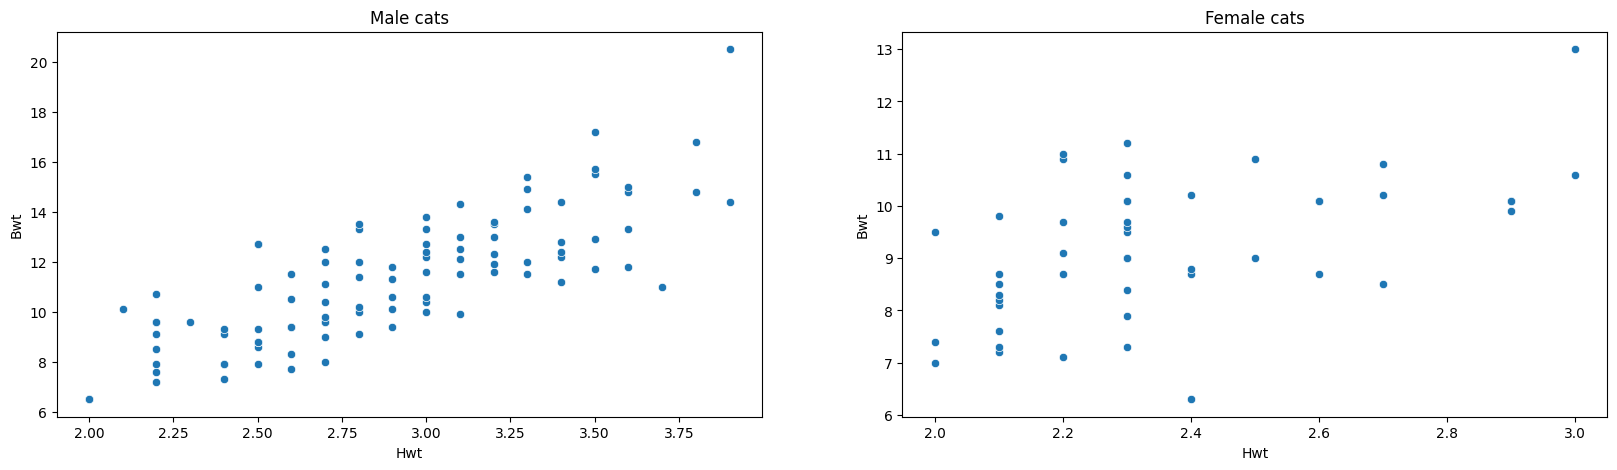

In [13]:
fig, axs = plt.subplots(1,2, figsize=(20,5)) # 1 rij, 2 kolommen, figsize voor het groter te maken
sns.scatterplot(ax=axs[0], data=male_cats, x='Hwt', y='Bwt')
axs[0].set_title("Male cats")

sns.scatterplot(ax=axs[1], data=female_cats, x='Hwt', y='Bwt')
axs[1].set_title("Female cats")

3. Calculate and draw the regression line.


<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

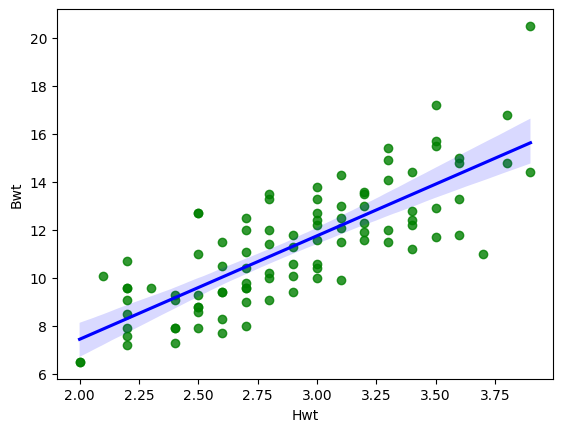

In [14]:
# Draw regression line
# male
sns.regplot(x=male_cats.Hwt, y=male_cats.Bwt, line_kws={'color': 'b'}, scatter_kws={'color': 'g'})

<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

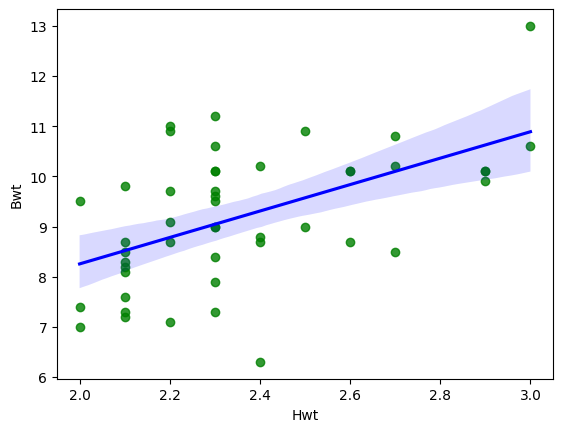

In [15]:
# Draw regression line
# female
sns.regplot(x=female_cats.Hwt, y=female_cats.Bwt, line_kws={'color': 'b'}, scatter_kws={'color': 'g'})

In [16]:
# Calculate regression line
# male
from sklearn.linear_model import LinearRegression

male_cats_x = male_cats.Hwt.values.reshape(-1,1)
male_cats_y = male_cats.Bwt

weight_model = LinearRegression().fit(male_cats_x, male_cats_y)

print(f"Regression line: y = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: y = -1.18 + 4.31 x


In [17]:
# Calculate regression line
# female
from sklearn.linear_model import LinearRegression

female_cats_x = female_cats.Hwt.values.reshape(-1,1)
female_cats_y = female_cats.Bwt

weight_model = LinearRegression().fit(female_cats_x, female_cats_y)

print(f"Regression line: y = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: y = 2.98 + 2.64 x


4. Calculate the correlation coefficient and the coefficient of determination.


In [18]:
# Male
cor = np.corrcoef(male_cats.Hwt, male_cats.Bwt)[0][1]
print(f"R == {cor}")

print(f"R**2 == {cor**2}")

R == 0.7930443171812304
R**2 == 0.628919289013444


In [19]:
# Female
cor = np.corrcoef(female_cats.Hwt, female_cats.Bwt)[0][1]
print(f"R == {cor}")

print(f"R**2 == {cor**2}")

R == 0.5320496665060397
R**2 == 0.28307684762918806


5. Interpret the results from the previous steps.

In [ ]:
# Male
# R-waarde is 0.79 -> increasing and strong linear relation
# R**2-waarde is 0.62 -> The heart weight vs. body weight relationship accounts for 62% of the variation in body weight

# Female
# R-waarde is 0.53 -> 
# R**2-waarde is 0.28 -> 

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |


## Exercise 2: Vlaamse land en tuinbouwbedrijven

1. Use the dataset Landbouw Vlaanderen. The file contains data about farms in Vlaanderen

Source: Departement Landbouw en Visserij op basis StatBel

In [20]:
landbouw = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Landbouw%20Vlaanderen.csv', delimiter = ";")
# Show the first few records of the Data Frame
landbouw.head()

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha)
0,1980,75706,"8,38"
1,1981,73292,"8,58"
2,1982,71255,"8,79"
3,1983,69807,"8,94"
4,1984,68083,"9,15"


2. What are the datatypes for each of the columns.

In [23]:
landbouw.dtypes

jaar                                        int64
aantal land en tuinbouwbedrijven            int64
gemiddelde oppervlakte per bedrijf (ha)    object
dtype: object

3. Change the datatype of 'gemiddelde oppervlakte per bedrijf (ha)' to float.

In [24]:
# String -> float
landbouw['gemiddelde oppervlakte per bedrijf (ha)'] = landbouw['gemiddelde oppervlakte per bedrijf (ha)'].str.replace(",", ".").astype(float)
landbouw.head()

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha)
0,1980,75706,8.38
1,1981,73292,8.58
2,1982,71255,8.79
3,1983,69807,8.94
4,1984,68083,9.15


In [27]:
aantal = 'aantal land en tuinbouwbedrijven'
opp = 'gemiddelde oppervlakte per bedrijf (ha)'

4. Draw a scatter plot of the number of farms versus the year.


<AxesSubplot:xlabel='jaar', ylabel='aantal land en tuinbouwbedrijven'>

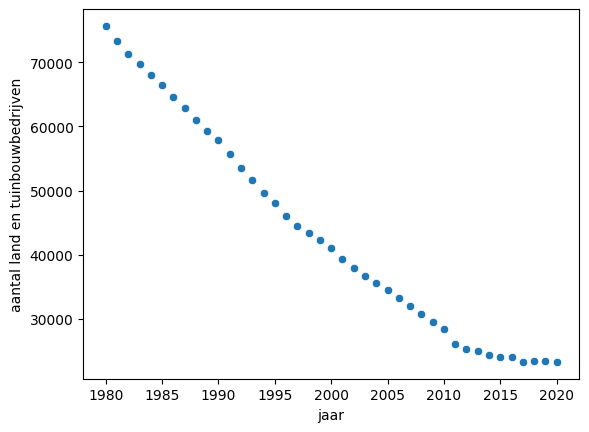

In [28]:
sns.scatterplot(data=landbouw, x='jaar', y=aantal)

5. Is there a positive / negative relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R = -0.9861066349492859

In [30]:
cor = np.corrcoef(landbouw.jaar, landbouw['aantal land en tuinbouwbedrijven'])[0][1]
print(f"R = {cor}")

print(f"R**2 = {cor**2}")

R = -0.9861066349492859
R**2 = 0.9724062954910041


6. Is there a strong relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R² = 0.9724062954910041

In [ ]:
# R-waarde is -0.98 -> decreasing and exceptionly strong relation
# R**2-waarde is 0.97 -> The year vs. aantal land en tuinbouwbedrijven accounts for 97% of the variation in aantal land en tuinbouwbedrijven

R² = 0.9724062954910041


7. Draw a scatter plot of the 'gemiddelde oppervlakte per bedrijf (ha)' versus the year.

<AxesSubplot:xlabel='jaar', ylabel='gemiddelde oppervlakte per bedrijf (ha)'>

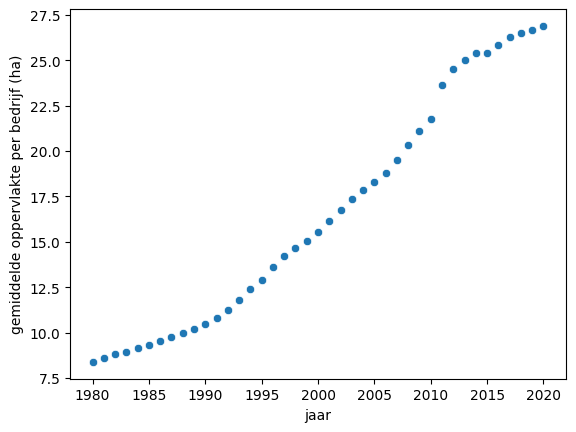

In [31]:
sns.scatterplot(data=landbouw, x='jaar', y=opp)

8. What will be the 'gemiddelde oppervlakte per bedrijf (ha)' in 2035?

Gemiddelde oppervlakte in 2035 = 34.91987804878045

In [32]:
from sklearn.linear_model import LinearRegression

landbouw_x = landbouw.jaar.values.reshape(-1,1)
landbouw_y = landbouw['gemiddelde oppervlakte per bedrijf (ha)']

weight_model = LinearRegression().fit(landbouw_x, landbouw_y)

print(f"Gemiddelde oppervlakte per bedrijg in 2035 = {weight_model.intercept_ + weight_model.coef_[0] * 2035} ")

Gemiddelde oppervlakte per bedrijg in 2035 = 34.91987804878045 


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

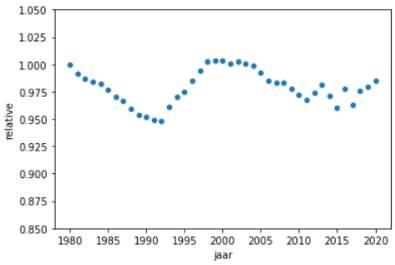


In [33]:
landbouw['tot_oppervlakte'] = landbouw['aantal land en tuinbouwbedrijven'] * landbouw['gemiddelde oppervlakte per bedrijf (ha)']
landbouw.head()

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha),tot_oppervlakte
0,1980,75706,8.38,634416.28
1,1981,73292,8.58,628845.36
2,1982,71255,8.79,626331.45
3,1983,69807,8.94,624074.58
4,1984,68083,9.15,622959.45


In [34]:
tot_opp_1980 = landbouw.iloc[0,3]
print(tot_opp_1980)

634416.28


In [35]:
landbouw['relatief_opp_tov_1980'] = landbouw['tot_oppervlakte'] / tot_opp_1980
landbouw.head()

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha),tot_oppervlakte,relatief_opp_tov_1980
0,1980,75706,8.38,634416.28,1.000000
1,1981,73292,8.58,628845.36,0.991219
2,1982,71255,8.79,626331.45,0.987256
3,1983,69807,8.94,624074.58,0.983699
4,1984,68083,9.15,622959.45,0.981941


## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [36]:
movies = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [37]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

In [38]:
for c in cols_with_dollars:
  movies[c] = movies[c].str.replace('$','').str.replace(' ','').astype(float) / 1000000

movies.head()   

C:\Users\Joris\AppData\Local\Temp\ipykernel_17344\4163027734.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies[c] = movies[c].str.replace('$','').str.replace(' ','').astype(float) / 1000000


,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22.707121,32.109139,39.517763,11.000000,15.909367,16.0
1,2.0,Year of the Dog,Paramount Vantage,Drama,0.141803,0.318598,1.540141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,12.839402,NaN,22.466994,18.200000,27.040983,25.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28.263594,42.853277,61.356221,15.000000,33.166898,14.0
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,39.868642,44.407533,38.189217,16.5


3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

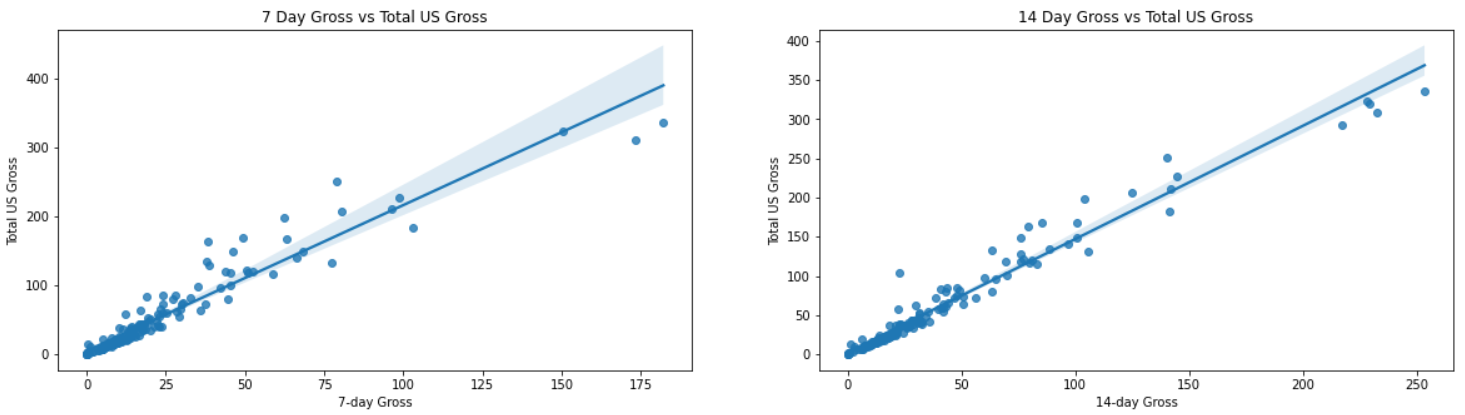

Text(0.5, 1.0, '14 Day Gross vs Total US Gross')

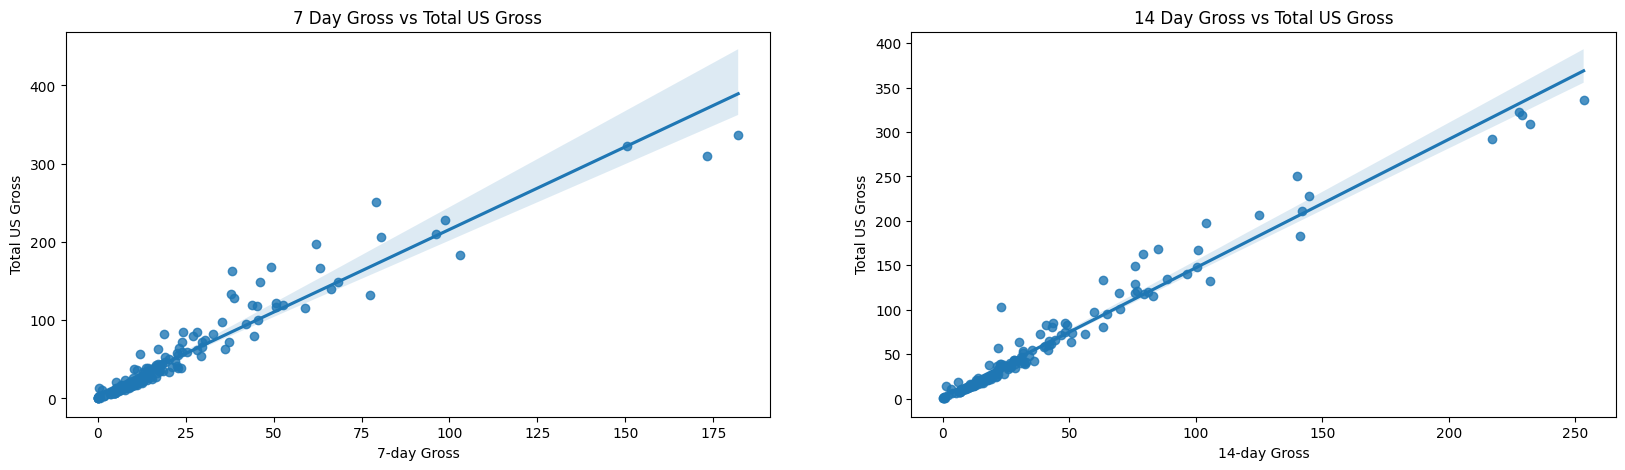

In [39]:
fig, axs = plt.subplots(1,2, figsize=(20,5)) # 1 rij, 2 kolommen, figsize voor het groter te maken
sns.regplot(ax=axs[0], data=movies, x='7-day Gross', y='Total US Gross')
axs[0].set_title("7 Day Gross vs Total US Gross")

sns.regplot(ax=axs[1], data=movies, x='14-day Gross', y='Total US Gross')
axs[1].set_title("14 Day Gross vs Total US Gross")

4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [40]:
s7_days_gross = movies.dropna(subset=['7-day Gross'])
# s7_days_gross.head()

cor = np.corrcoef(s7_days_gross['7-day Gross'], s7_days_gross['Total US Gross'])[0][1]
print(f"R (7 Day Gross vs Total US Gross) = {cor}")
print(f"R**2 (7 Day Gross vs Total US Gross) = {cor**2}")

R (7 Day Gross vs Total US Gross) = 0.9594075444143062
R**2 (7 Day Gross vs Total US Gross) = 0.920462836279089


5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

In [41]:
f14_days_gross = movies.dropna(subset=['14-day Gross'])
# f14_days_gross.head()

cor = np.corrcoef(f14_days_gross['14-day Gross'], f14_days_gross['Total US Gross'])[0][1]
print(f"R (14 Day Gross vs Total US Gross) = {cor}")
print(f"R**2 (14 Day Gross vs Total US Gross) = {cor**2}")

R (14 Day Gross vs Total US Gross) = 0.9813238689021968
R**2 (14 Day Gross vs Total US Gross) = 0.9629965356771759


In [43]:
from sklearn.linear_model import LinearRegression

movies_x = s7_days_gross['7-day Gross'].values.reshape(-1,1)
movies_y = s7_days_gross['Total US Gross']

weight_model = LinearRegression().fit(movies_x, movies_y)

print(f" line  7 days = {weight_model.intercept_} + {weight_model.coef_[0]} * x ")

 line  7 days = 4.590921233818129 + 2.113464756610182 * x 


In [44]:
from sklearn.linear_model import LinearRegression

movies_x = f14_days_gross['14-day Gross'].values.reshape(-1,1)
movies_y = f14_days_gross['Total US Gross']

weight_model = LinearRegression().fit(movies_x, movies_y)

print(f" line 14 days = {weight_model.intercept_} + {weight_model.coef_[0]} * x ")

 line 14 days = 2.44900289255105 + 1.4464530702590803 * x 


In [45]:
# betekenis slope: als film in de eerste week 10 miljoen meer opbrengt -> totale opbrengst + 20 miljoen

6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

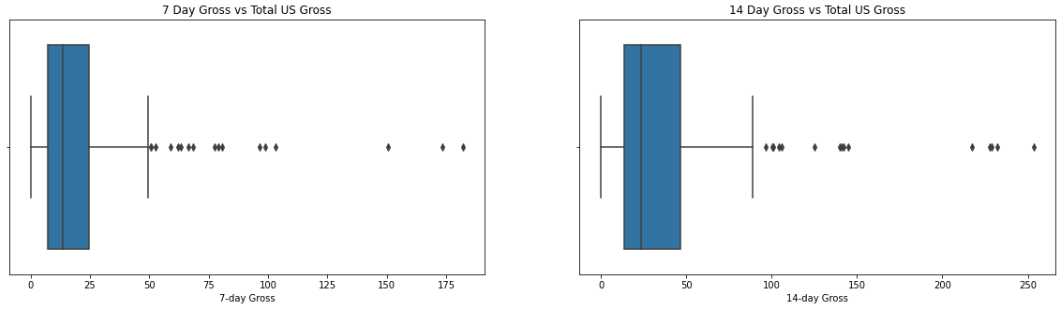

Text(0.5, 1.0, '14 Day Gross vs Total US Gross')

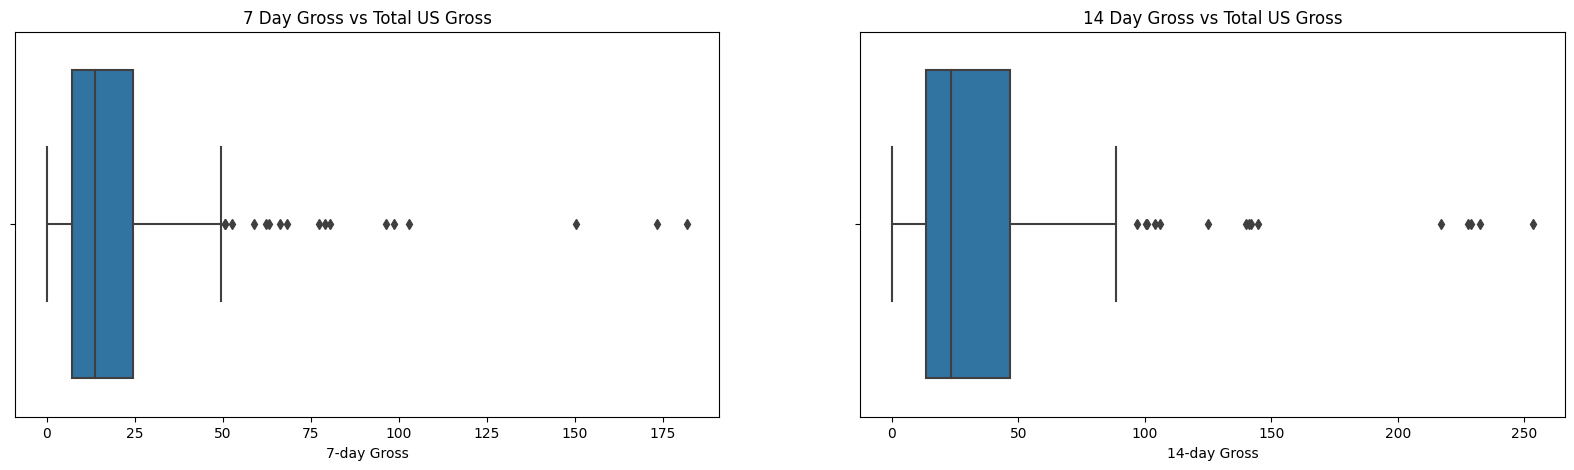

In [46]:
fig, axs = plt.subplots(1,2, figsize=(20,5)) # 1 rij, 2 kolommen, figsize voor het groter te maken
sns.boxplot(ax=axs[0], data=movies, x='7-day Gross')
axs[0].set_title("7 Day Gross vs Total US Gross")

sns.boxplot(ax=axs[1], data=movies, x='14-day Gross')
axs[1].set_title("14 Day Gross vs Total US Gross")

* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

In [47]:
q1 = s7_days_gross['7-day Gross'].quantile(0.25)
q3 = s7_days_gross['7-day Gross'].quantile(0.75)
limit_7_days_gross = q3 + 1.5 * (q3 - q1)
print('limit_7_days_gross is ' + str(limit_7_days_gross))

q1 = f14_days_gross['14-day Gross'].quantile(0.25)
q3 = f14_days_gross['14-day Gross'].quantile(0.75)
limit_14_days_gross = q3 + 1.5 * (q3 - q1)
print('f14_days_gross is ' + str(limit_14_days_gross))

limit_7_days_gross is 50.376637875
f14_days_gross is 96.2906745


* 6.3 What are the outliers for the first week or two?

A few movies for the first week: 

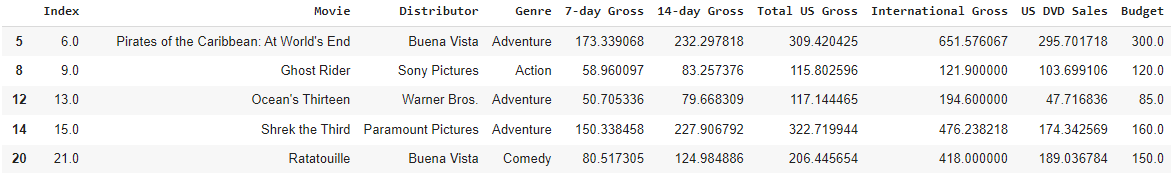

In [48]:
s7_days_gross[s7_days_gross['7-day Gross'] > limit_7_days_gross]

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173.339068,232.297818,309.420425,651.576067,295.701718,300.0
8,9.0,Ghost Rider,Sony Pictures,Action,58.960097,83.257376,115.802596,121.900000,103.699106,120.0
12,13.0,Ocean's Thirteen,Warner Bros.,Adventure,50.705336,79.668309,117.144465,194.600000,47.716836,85.0
14,15.0,Shrek the Third,Paramount Pictures,Adventure,150.338458,227.906792,322.719944,476.238218,174.342569,160.0
20,21.0,Ratatouille,Buena Vista,Comedy,80.517305,124.984886,206.445654,418.000000,189.036784,150.0
28,29.0,The Bourne Ultimatum,Universal,Action,98.673300,144.820320,227.471070,214.690492,123.288965,130.0
31,32.0,I Now Pronounce You Chuck and Larry,Universal,Comedy,52.547115,81.169105,119.725280,65.983182,69.258990,85.0
32,33.0,Fantastic Four: Rise of the Silver Surfer,20th Century Fox,Action,77.453559,105.800808,131.921738,156.293581,62.251422,120.0
35,36.0,Casino Royale,MGM,Action,63.267784,100.763154,167.365000,429.000000,79.665820,102.0
59,60.0,Superbad,Sony Pictures,Comedy,50.572274,76.834795,121.463226,48.400000,134.374749,17.5


* 6.4 Remove the outliers out of the dataset.

In [49]:
s7_days_gross = s7_days_gross[s7_days_gross['7-day Gross'] > limit_7_days_gross]
f14_days_gross = f14_days_gross[f14_days_gross['14-day Gross'] > limit_14_days_gross]

* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

In [50]:
cor = np.corrcoef(s7_days_gross['7-day Gross'], s7_days_gross['Total US Gross'])[0][1]
print(f"R (7 Day Gross vs Total US Gross) = {cor}")
print(f"R**2 (7 Day Gross vs Total US Gross) = {cor**2}")

R (7 Day Gross vs Total US Gross) = 0.9097685055804334
R**2 (7 Day Gross vs Total US Gross) = 0.8276787337460552


* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x

In [51]:
cor = np.corrcoef(f14_days_gross['14-day Gross'], f14_days_gross['Total US Gross'])[0][1]
print(f"R (14 Day Gross vs Total US Gross) = {cor}")
print(f"R**2 (14 Day Gross vs Total US Gross) = {cor**2}")

R (14 Day Gross vs Total US Gross) = 0.9563304302678105
R**2 (14 Day Gross vs Total US Gross) = 0.9145678918562156


In [52]:
from sklearn.linear_model import LinearRegression

movies_x = s7_days_gross['7-day Gross'].values.reshape(-1,1)
movies_y = s7_days_gross['Total US Gross']

weight_model = LinearRegression().fit(movies_x, movies_y)

print(f" line 14 days = {weight_model.intercept_} + {weight_model.coef_[0]} * x ")

 line 14 days = 50.55232792560807 + 1.6172068421722523 * x 


In [53]:
from sklearn.linear_model import LinearRegression

movies_x = f14_days_gross['14-day Gross'].values.reshape(-1,1)
movies_y = f14_days_gross['Total US Gross']

weight_model = LinearRegression().fit(movies_x, movies_y)

print(f" line 14 days = {weight_model.intercept_} + {weight_model.coef_[0]} * x ")

 line 14 days = 42.9373995939832 + 1.1862859399038146 * x 
